In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

In [2]:
tf.__version__

'2.4.1'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Differences between loading a model from Scikit-Learn and Keras:
1. Keras provides samples in 28x28 array instead of 784x1
2. the px intensities are _int_ and not _float_

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])

Coat


In [5]:
model = keras.models.Sequential() # simplest Keras model. Sequence of layers connected
model.add(keras.layers.Flatten(input_shape=[28, 28])) # flats the entries from 28x28 to 1D array
model.add(keras.layers.Dense(300, activation="relu")) # manages its own weight matrix and a vector of bias terms
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # softmax because the classes are exclusive

In [6]:
# Alternatively you can do so
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


Lots of parameter in one layer give flexibility but likewise the risk of overfitting

In [9]:
print(model.layers)
print(model.layers[1].name)
print(model.get_layer('dense_3').name)

[<tensorflow.python.keras.layers.core.Flatten object at 0x000001E057C135B0>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E057C13820>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E057C13B20>, <tensorflow.python.keras.layers.core.Dense object at 0x000001E057C13E80>]
dense_3
dense_3


In [10]:
weights, biases = model.layers[1].get_weights()
print(weights)
print(weights.shape)
print(biases.shape)

[[-0.06591538 -0.04258843 -0.06125759 ... -0.06310703 -0.014758
   0.05193678]
 [ 0.03565789 -0.00507195 -0.03249889 ... -0.04906734 -0.07216693
  -0.05161661]
 [-0.04546762  0.07286914 -0.04757213 ...  0.00148711 -0.01548071
  -0.04417607]
 ...
 [ 0.03791095 -0.01653283  0.01818878 ...  0.05791792  0.04634949
   0.05374642]
 [ 0.01169322 -0.02764177 -0.01060294 ...  0.04013135  0.02488589
   0.04151374]
 [ 0.00572349  0.05106379  0.07176374 ... -0.07044404 -0.05665747
  -0.00018634]]
(784, 300)
(300,)


If I know the input shape when creating the model, it is best to specify it.

After the model is created, I must call its _compile()_ method to specify the loss function and the optimizer to use

In [11]:
model.compile(loss="sparse_categorical_crossentropy", # because we have sparse labels -> for each instance there's just a target class index and exclusive classes
              optimizer="sgd", # better to use =keras.ptimizers.SGD(lr=??) to set the learning rate
              metrics=["accuracy"])

keras.utils.to_categorical() to transform from sparse labels to one-hot-vector.

np.argmax() and axis=1 to go theother way round

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9760 - accuracy: 0.6853 - val_loss: 0.5274 - val_accuracy: 0.8162
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5081 - accuracy: 0.8264 - val_loss: 0.4657 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4444 - accuracy: 0.8448 - val_loss: 0.4062 - val_accuracy: 0.8592
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4161 - accuracy: 0.8543 - val_loss: 0.3915 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3949 - accuracy: 0.8599 - val_loss: 0.3792 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3732 - accuracy: 0.8684 - val_loss: 0.3730 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3625 - accuracy: 0.8702 - val_loss: 0.3622 - val_accuracy:

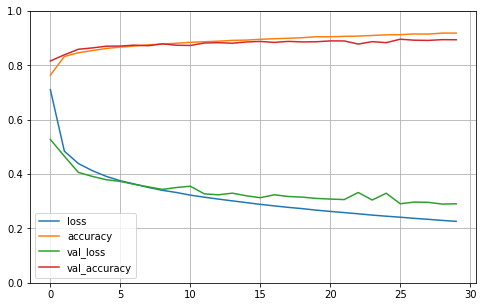

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3221 - accuracy: 0.8854


[0.32206082344055176, 0.8853999972343445]

#### Some hyperparameter to tune
1. learning rate
2. the optimizer
3. number of layers
4. number of neurons per layer
5. activation functions to use for each hidden layer
6. the batch size

<b>ALERT: DO NOT TWEAK THE HYPERPARAMETERS ON THE TEST SET</b>

### Using the Model to Make Predictions

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [18]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [19]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a RegressionMLP Using te Sequential API

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

The main differences are the fact that the output layer has a single neuron (since we only want to
predict a single value) and uses no activation function, and the loss function is the
mean squared error.

Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting.

In [4]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - ETA: 0s - loss: n - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==================

## Building Complex Models Using the Functional API
This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).

A regular MLP forces all the data to flow through the full stack of layers, thus
simple patterns in the data may end up being distorted by this sequence of transformations.

In [7]:
inputt = keras.layers.Input(shape=X_train.shape[1:]) # specification of the kind of input model will get
hidden1 = keras.layers.Dense(30, activation="relu")(inputt) # call it like a function, passing it the input. 
                                                            # This is why this is called the Functional API
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inputt, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[inputt], outputs=[output])

Once you have built the Keras model, everything is exactly like earlier, so no need to
repeat it here: you must compile the model, train it, evaluate it and use it to make
predictions.

In [8]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

When we call the fit() method, instead of passing a single input matrix X_train, we must pass a
pair of matrices (X_train_A, X_train_B): one per input

In [9]:
model.compile(loss="mse", optimizer="sgd")
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

Use cases:
- the task demand it. For instance locate and classify main object in a picture --> bot classification and regression task
- you may have multiple independent tasks to perform based on the same data
- a regularization technique. For example, you may want to add some auxiliary outputs in a neural network
architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

In [10]:
# [...] Same as above, up to the main output layer
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
outputs=[output, aux_output])

Each output will need its own loss function.

Keras will compute all these losses and simply add them up to get the final loss used for training.

It is possible to set all the loss weights when compiling the model:

In [11]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

We need to provide some labels for each output.

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Building Dynamic Models Using the Subclassing API

In [13]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

This extra flexibility comes at a cost: 
- your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it, 
- Keras cannot save or clone it,
- when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other
- Keras cannot check types and shapes ahead of time, and it is easier to make mistakes


TO SUMMARIZE: unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API

### Saving and Restoring a Model
- Sequencial API or Functional API
    - Saving
```python
    model = keras.models.Sequential([...])
    model.compile([...])
    model.fit([...])
    model.save("my_keras_model.h5")
```
    - Restoring
```python
    model = keras.models.load_model("my_keras_model.h5")
```

- Dynamics Model:
You can just save the model's parameters with _save_weights()_ and _restore_weights()_, but anything else should be saved by myself

## Using Callbacks
The fit() method accepts a callbacks argument that lets you specify a list of objects
that Keras will call during training at the start and end of training, at the start and end
of each epoch and even before and after processing each batch.

If you use a validation set during training, you can set ```save_best_only=True ``` when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Another wqay to implement early stopping is with the EarlyStopping callback.

You can combine both callbacks to both save checkpoints of your model, and actually interrupt training early when there is no more progress

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

If you need extra control, you can easily write your own custom callbacks
```python
    class PrintValTrainRatioCallback(keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs):
            print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
```


## Visualization Using TensorBoard

TensorBoard is a great interactive visualization tool.

To use it, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files.

Each binary data record is called a summary.

In general, you want to point the TensorBoard server to a root log directory, and configure your program so that it writes to a different subdirectory every time it runs.

In [ ]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_01_16-11_28_43'

# [...] Build and compile your model
model.compile(loss="mse", optimizer="sgd")
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

To start the TensorBand server type
```BASH
    python -m tensorband.main --logdir=./my_logs --port=6006
```
Alternatively type directly in Jupyter:
```Jupyter
    %load_ext tensorboard
    %tensorboard --logdir=./my_logs --port=6006
```

In [ ]:
tensor_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

with writer.as_default():
        for step in range(1, 1000 + 1):
            tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
            data = (np.random.randn(100) + 2) * step / 100 # some random data
            tf.summary.histogram("my_hist", data, buckets=50, step=step)
            data = np.random.randn(2, 32, 32, 3) # random 32x32 RGB images
            tf.summary.image("my_images", images * step / 1000, step=step)
            # ...

# Fine-Tuning NN Hyperparameters
One option is to simply try many combinations of hyperparameters and see which one works best on the validation set. For this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors

In [11]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [12]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
print(type(keras_reg))

<class 'tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor'>


The _KerasRegressor_ object is a thin wrapper around the Keras model built using build_model().

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method

In [21]:
keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid), 
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 103514582046790450184340897792.0000 - val_loss: 3316130541647728702652416.0000
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 1562744285004331611062272.0000 - val_loss: 41989982162133297659904.0000
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 19788039712328602615808.0000 - val_loss: 531694620163639869440.0000
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 250563964556965838848.0000 - val_loss: 6732504310430564352.0000
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 3172730522020958720.0000 - val_loss: 85249431468769280.0000
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 40174272338132272.0000 - val_loss: 1079460975607808.0000
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 508702242514786.4375 - val_loss: 13668555161600.0000
Epoch 8/100
363/363 [=

In [23]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, 
                  validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 911us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/s

242/242 [==============================] - 0s 2ms/step - loss: 44775951558.0576 - val_loss: 34849550336.0000
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 32168934496.9218 - val_loss: 25037393920.0000
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 23111554448.3292 - val_loss: 17987964928.0000
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 16604361997.6955 - val_loss: 12923353088.0000
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 11929300402.0412 - val_loss: 9284702208.0000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 8570527604.9383 - val_loss: 6670522880.0000
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 6157435737.5473 - val_loss: 4792396288.0000
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 4423769786.4691 - val_loss: 3443057664.0000
Epoch 11/100
242/242 [============================

242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 6ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 836us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 

242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 926us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - ETA: 0s - loss: n - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 

C:\Users\Federico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000002BFF29CA5B0>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

There are many techniques to explore a search space much more efficiently than randomly.

This takes care of the “zooming” process for you and leads to much better solutions in much less time. Here are a few Python libraries you can use to optimize hyperparameters.

- Hyperopt -> for optimizing over all sorts of complex search spaces
- Hyperas, kopt or Talos -> optimizing hyperparameters for Keras model (first two based on Hyperopt)
- Scikit-Optimize -> a general-purpose optimization library
- Spearmint -> Bayesian optimization library
- Hyperband -> based on the receent Hyperband paper
- Sklearn-Deap -> hyperparameter optimization library based on evolutionary algorithms, also with a GridSearchCV-like interface
- Many more...


Many companies offer services for such optimizations:
* Google Cloud AI Platform
* Arimo
* SigOpt
* CallDesk's Oscar

## Number of Hidden Layers
transfer learning -> it will only have to learn the higher-level structures and not all the layers.

For many problems you can start with just one or two hidden layers and it will work just fine.

For more complex problems, you can gradually ramp up the number of hidden layers, until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers

## Number of Neurons per Hidden Layer
It is determined by the type of input and output your task requires. For example, the MNIST task requires 28 x 28 = 784 input neurons and 10 output neurons.

A simpler and more efficient approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting and other regularization techniques, such as dropout --> <u>stretch pants</u> approach
With this approach, you avoid bottleneck layers that could ruin your model.

GENERAL RULE: I'll get more bang for my buck by increasing the number of layers instead of the number of neurons per layer

## Learning Rate, Batch Size and Other Hyperparameters
1. <u>Learning rate</u>: the optimal is about half of the maximum learning rate (i.e. the leraning rate above which the training algorithm diverges).
Train the model for a few hundred iterations, starting with a very low learning rate (10e-5) and gradually increasing it up to a very large value (10) --> multiply it by a constant factor at each iteration (exp(log(10e6)/500) to go from 10e-5 to 10 in 500 iterations).
The optimal l.r. will be a bit lower than the point at which the loss starts to climb (10 times lower typically)

2. <u>Optimizer</u>: Choosing a better optimizer than plain old Mini-batch Gradient Descent (see next chapter)

3. <u>Batch size</u>: one strategy is to try to use large batch size (for instance up to 8192) using learning rate warmup (small then ramping it up) but if training is unstable or performances are disappointing, then try using a small batch size instead
4. <u>Activatin function</u>:  
    - hidden layers -> ReLU is a good default
    - output layer: depends on my task
5. <u>Number of iterations</u>: use early stopping

GENERAL RULE: if you modify any yperparameter, make sure to update the learning rate as well

<a href="https://homl.info/1cycle">More info regarding tuning NN hyperparameters - 2018 paper by Leslie Smith</a>


# Excercises

2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B)
<center>
    <img src="ex2_solution.jpg" alt="ex2 solution">
</center>
                         
3. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?
<span style="color:gold">Because Perceptrons do not output a class probability but make predictions based on a hard threshold and they are incapable of solving some trivial problems.</span>

4. Why was the logistic activation function a key ingredient in training the first MLPs?
<span style="color:gold">Because after the uncover of the Backpropagation algorithm they found out it would have been worked properly with that function instead of te step function. The logistic function has a well-defined nonzero derivative everywhere.</span>

5. Name three popular activation functions. Can you draw them?
- <span style="color:gold">Sigmoid</span>
- <span style="color:gold">Tanh</span>
- <span style="color:gold">ReLU</span>
- <span style="color:gold">Leaky ReLU</span>

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.
* What is the shape of the input matrix X?
<span style="color:gold">m x 10 with m = training_batch_size</span>
* What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?
<span style="color:gold">Wh = 10 x 50; bh.length = 10</span>
* What is the shape of the output layer’s weight vector Wo, and its bias vector bo?
<span style="color:gold">Wo = 50 x 3; bo.length = 3</span>
* What is the shape of the network’s output matrix Y?
<span style="color:gold">m x 3</span>
* Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.
<span style="color:gold">Y* = ReLU(ReLU(XWh + bh)Wo + bo)</span>

 
7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function? Answer the same questions for getting your network to predict housing prices as in Chapter 2.

<span style="color:gold">I need 1 neuron. I should use the logistic activation function. </span>

<span style="color:gold">If instead I want to tackle MNIST I should use 10 neurons and the softmax activation function.</span>
    
<span style="color:gold">Housing problem: 1 neuron and ReLU or softplus, since I'd expect a positive output.</span>
    
8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?
<span style="color:gold">It's an algorithm to compute the loss at every iteration. It handles one mini-batch at a time. After computing the prediction (forward pass) and the output error, using the derivatives (especially the chain-rule) the algorithm goes backward and weights how much every step has counted in the final loss value. In the end, it performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

    <span style="color:gold">Difference backpropagation-reverse autodiff: backpropagation refers to the whole process of trainig an ANN using multiple backpropagation steps. Reverse-mode autodiff is just a technique to ompute gradients efficiently, and it happens to be used by backpropagation</span>

9. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?
    
    <span style="color:gold">Learning rate, mini-batch size, number of hidden layers, number of neurons per layer, optimizer, number of iterations and the activation function.
    I can lower down the number of neurons per layer and hidden layers, regularize the learning rate gradually, decrease the mini-batch size and use the early stopping technique to stop the training when it has reached the optimal amount of iterations.</span>

10. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Try adding all the bells and whistles (i.e., save checkpoints, use early stopping, plot learning curves using TensorBoard, and so on).

In [18]:
(X_full_train, y_full_train), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [31]:
# x_full_train.shape = (60000, 28, 28)
# x_test.shape = (10000, 28, 28)
X_valid, X_train = X_full_train[:5000] / 255., X_full_train[5000:] / 255.
y_valid, y_train = y_full_train[:5000], y_full_train[5000:]
X_test = X_test / 255.

In [38]:
K = keras.backend
K.clear_session()

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [39]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [40]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [41]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [42]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 8s 4ms/step - loss: 438485786096392863744.0000 - accuracy: 0.4922 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

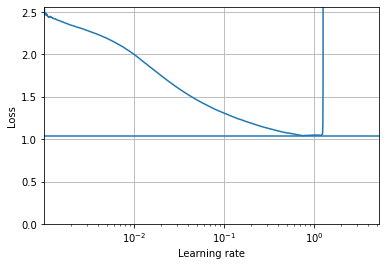

In [43]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates)) # Plot horizontal lines at each y from xmin to xmax.
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [45]:
import os

run_index = 3 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_003'

In [46]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 2.3079 - accuracy: 0.1096 - val_loss: 2.3030 - val_accuracy: 0.1126
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1129 - val_loss: 2.3014 - val_accuracy: 0.0958
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.1102 - val_loss: 2.3037 - val_accuracy: 0.1126
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 2.3033 - accuracy: 0.1090 - val_loss: 2.3015 - val_accuracy: 0.1126
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3035 - accuracy: 0.1079 - val_loss: 2.3048 - val_accuracy: 0.1126
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 2.3037 - accuracy: 0.1078 - val_loss: 2.3042 - val_accuracy: 0.1126
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3034 - accuracy: 0.1068 - val_loss: 2.3015 - val_ac

In [47]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3025 - accuracy: 0.0980


[2.30248761177063, 0.09799999743700027]